# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import plot_tree
from scipy.io import arff

import warnings
warnings.filterwarnings("ignore")

# Dataset Description

In [2]:
data = arff.loadarff('KDDTrain+.arff')
dataset_train= pd.DataFrame(data[0])

In [3]:
dataset_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
125969,8.0,b'udp',b'private',b'SF',105.0,145.0,b'0',0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,b'normal'
125970,0.0,b'tcp',b'smtp',b'SF',2231.0,384.0,b'0',0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,b'normal'
125971,0.0,b'tcp',b'klogin',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'


In [4]:
data = arff.loadarff('KDDTest+.arff')
dataset_test= pd.DataFrame(data[0])

In [5]:
dataset_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,b'tcp',b'smtp',b'SF',794.0,333.0,b'0',0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22540,0.0,b'tcp',b'http',b'SF',317.0,938.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22541,0.0,b'tcp',b'http',b'SF',54540.0,8314.0,b'0',0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,b'anomaly'
22542,0.0,b'udp',b'domain_u',b'SF',42.0,42.0,b'0',0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,b'normal'


In [6]:
dataset_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,b'tcp',b'smtp',b'SF',794.0,333.0,b'0',0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22540,0.0,b'tcp',b'http',b'SF',317.0,938.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22541,0.0,b'tcp',b'http',b'SF',54540.0,8314.0,b'0',0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,b'anomaly'
22542,0.0,b'udp',b'domain_u',b'SF',42.0,42.0,b'0',0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,b'normal'


In [7]:
print("Shape of Training Dataset:", dataset_train.shape)
print("Shape of Testing Dataset:", dataset_test.shape)

Shape of Training Dataset: (125973, 42)
Shape of Testing Dataset: (22544, 42)


In [8]:
dataset_train.head()
dataset_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,b'anomaly'


In [9]:
dataset_train.info()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [10]:
dataset_train.groupby(['class']).mean()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
class,,,,,,,,,,,,,,,,,,,,,
b'anomaly',423.320689,82820.141327,37524.482159,0.048746,0.000068,0.174262,0.001040,0.017568,0.000546,0.000017,...,222.025260,29.929081,0.187417,0.132131,0.178993,0.040062,0.595177,0.591329,0.201810,0.207008
b'normal',168.587396,13133.279331,4329.685223,0.000000,0.000148,0.230655,0.001381,0.507076,0.002034,0.002049,...,147.431923,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698


In [11]:
dataset_test.groupby(['class']).mean()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
class,,,,,,,,,,,,,,,,,,,,,
b'anomaly',348.856698,16347.013403,460.014260,0.004987,0.001247,0.146264,0.037170,0.067404,0.002883,0.000078,...,222.644666,83.054703,0.390600,0.139264,0.140283,0.020727,0.168801,0.173045,0.397827,0.391500
b'normal',47.068376,2530.512512,4165.124601,0.012975,0.000000,0.051385,0.001133,0.189270,0.001854,0.000515,...,155.843168,216.995057,0.896967,0.026151,0.121660,0.018200,0.004005,0.002139,0.016077,0.008879


In [12]:
xAttack_counts = dataset_train['class'].value_counts()
print('The number of normal attacks is ',xAttack_counts[0],',',round(xAttack_counts[0]/dataset_train.shape[0]*100,3),'%')
print('The number of attacks is ',xAttack_counts[1],',',round(xAttack_counts[1]/dataset_train.shape[0]*100,3),'%')


The number of normal attacks is  67343 , 53.458 %
The number of attacks is  58630 , 46.542 %


In [13]:
xAttack_counts = dataset_test['class'].value_counts()
print('The number of normal attacks is ',xAttack_counts[0],',',round(xAttack_counts[0]/dataset_train.shape[0]*100,3),'%')
print('The number of attacks is ',xAttack_counts[1],',',round(xAttack_counts[1]/dataset_train.shape[0]*100,3),'%')


The number of normal attacks is  12833 , 10.187 %
The number of attacks is  9711 , 7.709 %


# Dataset Cleaning

### Checking for duplicates

In [14]:
print("The initial data shape :",dataset_train.shape)
duplicate = dataset_train[dataset_train.duplicated(keep = 'last')]
print(duplicate)
print("The duplicated shape is:",duplicate.shape)

The initial data shape : (125973, 42)
       duration protocol_type   service   flag  src_bytes  dst_bytes  land  \
3882        0.0       b'icmp'  b'eco_i'  b'SF'        8.0        0.0  b'0'   
5142        0.0       b'icmp'  b'ecr_i'  b'SF'        8.0        0.0  b'0'   
19299       0.0       b'icmp'  b'eco_i'  b'SF'        8.0        0.0  b'0'   
23632       0.0       b'icmp'  b'ecr_i'  b'SF'        8.0        0.0  b'0'   
40577       0.0       b'icmp'  b'eco_i'  b'SF'        8.0        0.0  b'0'   
64513       0.0       b'icmp'  b'ecr_i'  b'SF'        8.0        0.0  b'0'   
72383       0.0       b'icmp'  b'ecr_i'  b'SF'        8.0        0.0  b'0'   
79859       0.0       b'icmp'  b'ecr_i'  b'SF'        8.0        0.0  b'0'   
82966       0.0       b'icmp'  b'eco_i'  b'SF'        8.0        0.0  b'0'   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
3882              0.0     0.0  0.0  ...                 2.0   
5142              0.0     0.0  0.0  ...                

In [15]:
dataset_train = dataset_train.drop_duplicates()
print("The data shape without duplicates:",dataset_train.shape)

The data shape without duplicates: (125964, 42)


In [16]:
print("The initial data shape :",dataset_test.shape)
duplicate = dataset_test[dataset_test.duplicated(keep = 'last')]
print(duplicate)
print("The duplicated shape is:",duplicate.shape)

The initial data shape : (22544, 42)
       duration protocol_type   service    flag  src_bytes  dst_bytes  land  \
1950        0.0        b'tcp'  b'other'  b'REJ'        0.0        0.0  b'0'   
8788        0.0        b'tcp'  b'other'  b'REJ'        0.0        0.0  b'0'   
10285       0.0        b'tcp'  b'other'  b'REJ'        0.0        0.0  b'0'   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
1950              0.0     0.0  0.0  ...                 1.0   
8788              0.0     0.0  0.0  ...                 1.0   
10285             0.0     0.0  0.0  ...                 1.0   

      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
1950                     0.0                     1.0   
8788                     0.0                     1.0   
10285                    0.0                     1.0   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
1950                           0.0                          0.0   
8788                           0.0

In [17]:
dataset_test = dataset_test.drop_duplicates()
print("The data shape without duplicates:",dataset_test.shape)

The data shape without duplicates: (22541, 42)


### Checking for missing values

In [18]:
print('The number of missing values is:',dataset_train.isnull().values.sum())
missing_percentage = dataset_train.isnull().sum()*100/len(dataset_train)
missing_value_df = pd.DataFrame({'missing_count': dataset_train.isnull().sum(),'missing_percentage': missing_percentage})
missing=missing_value_df[missing_value_df.missing_count != 0]
print(missing)

The number of missing values is: 0
Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []


In [19]:
# Check for missing values in the entire dataset
missing_values = dataset_test.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Display the total count of missing values in the dataset
total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Missing values per column:
Series([], dtype: int64)

Total missing values in the dataset: 0


# Data Preprocessing

### Correlation Matrix

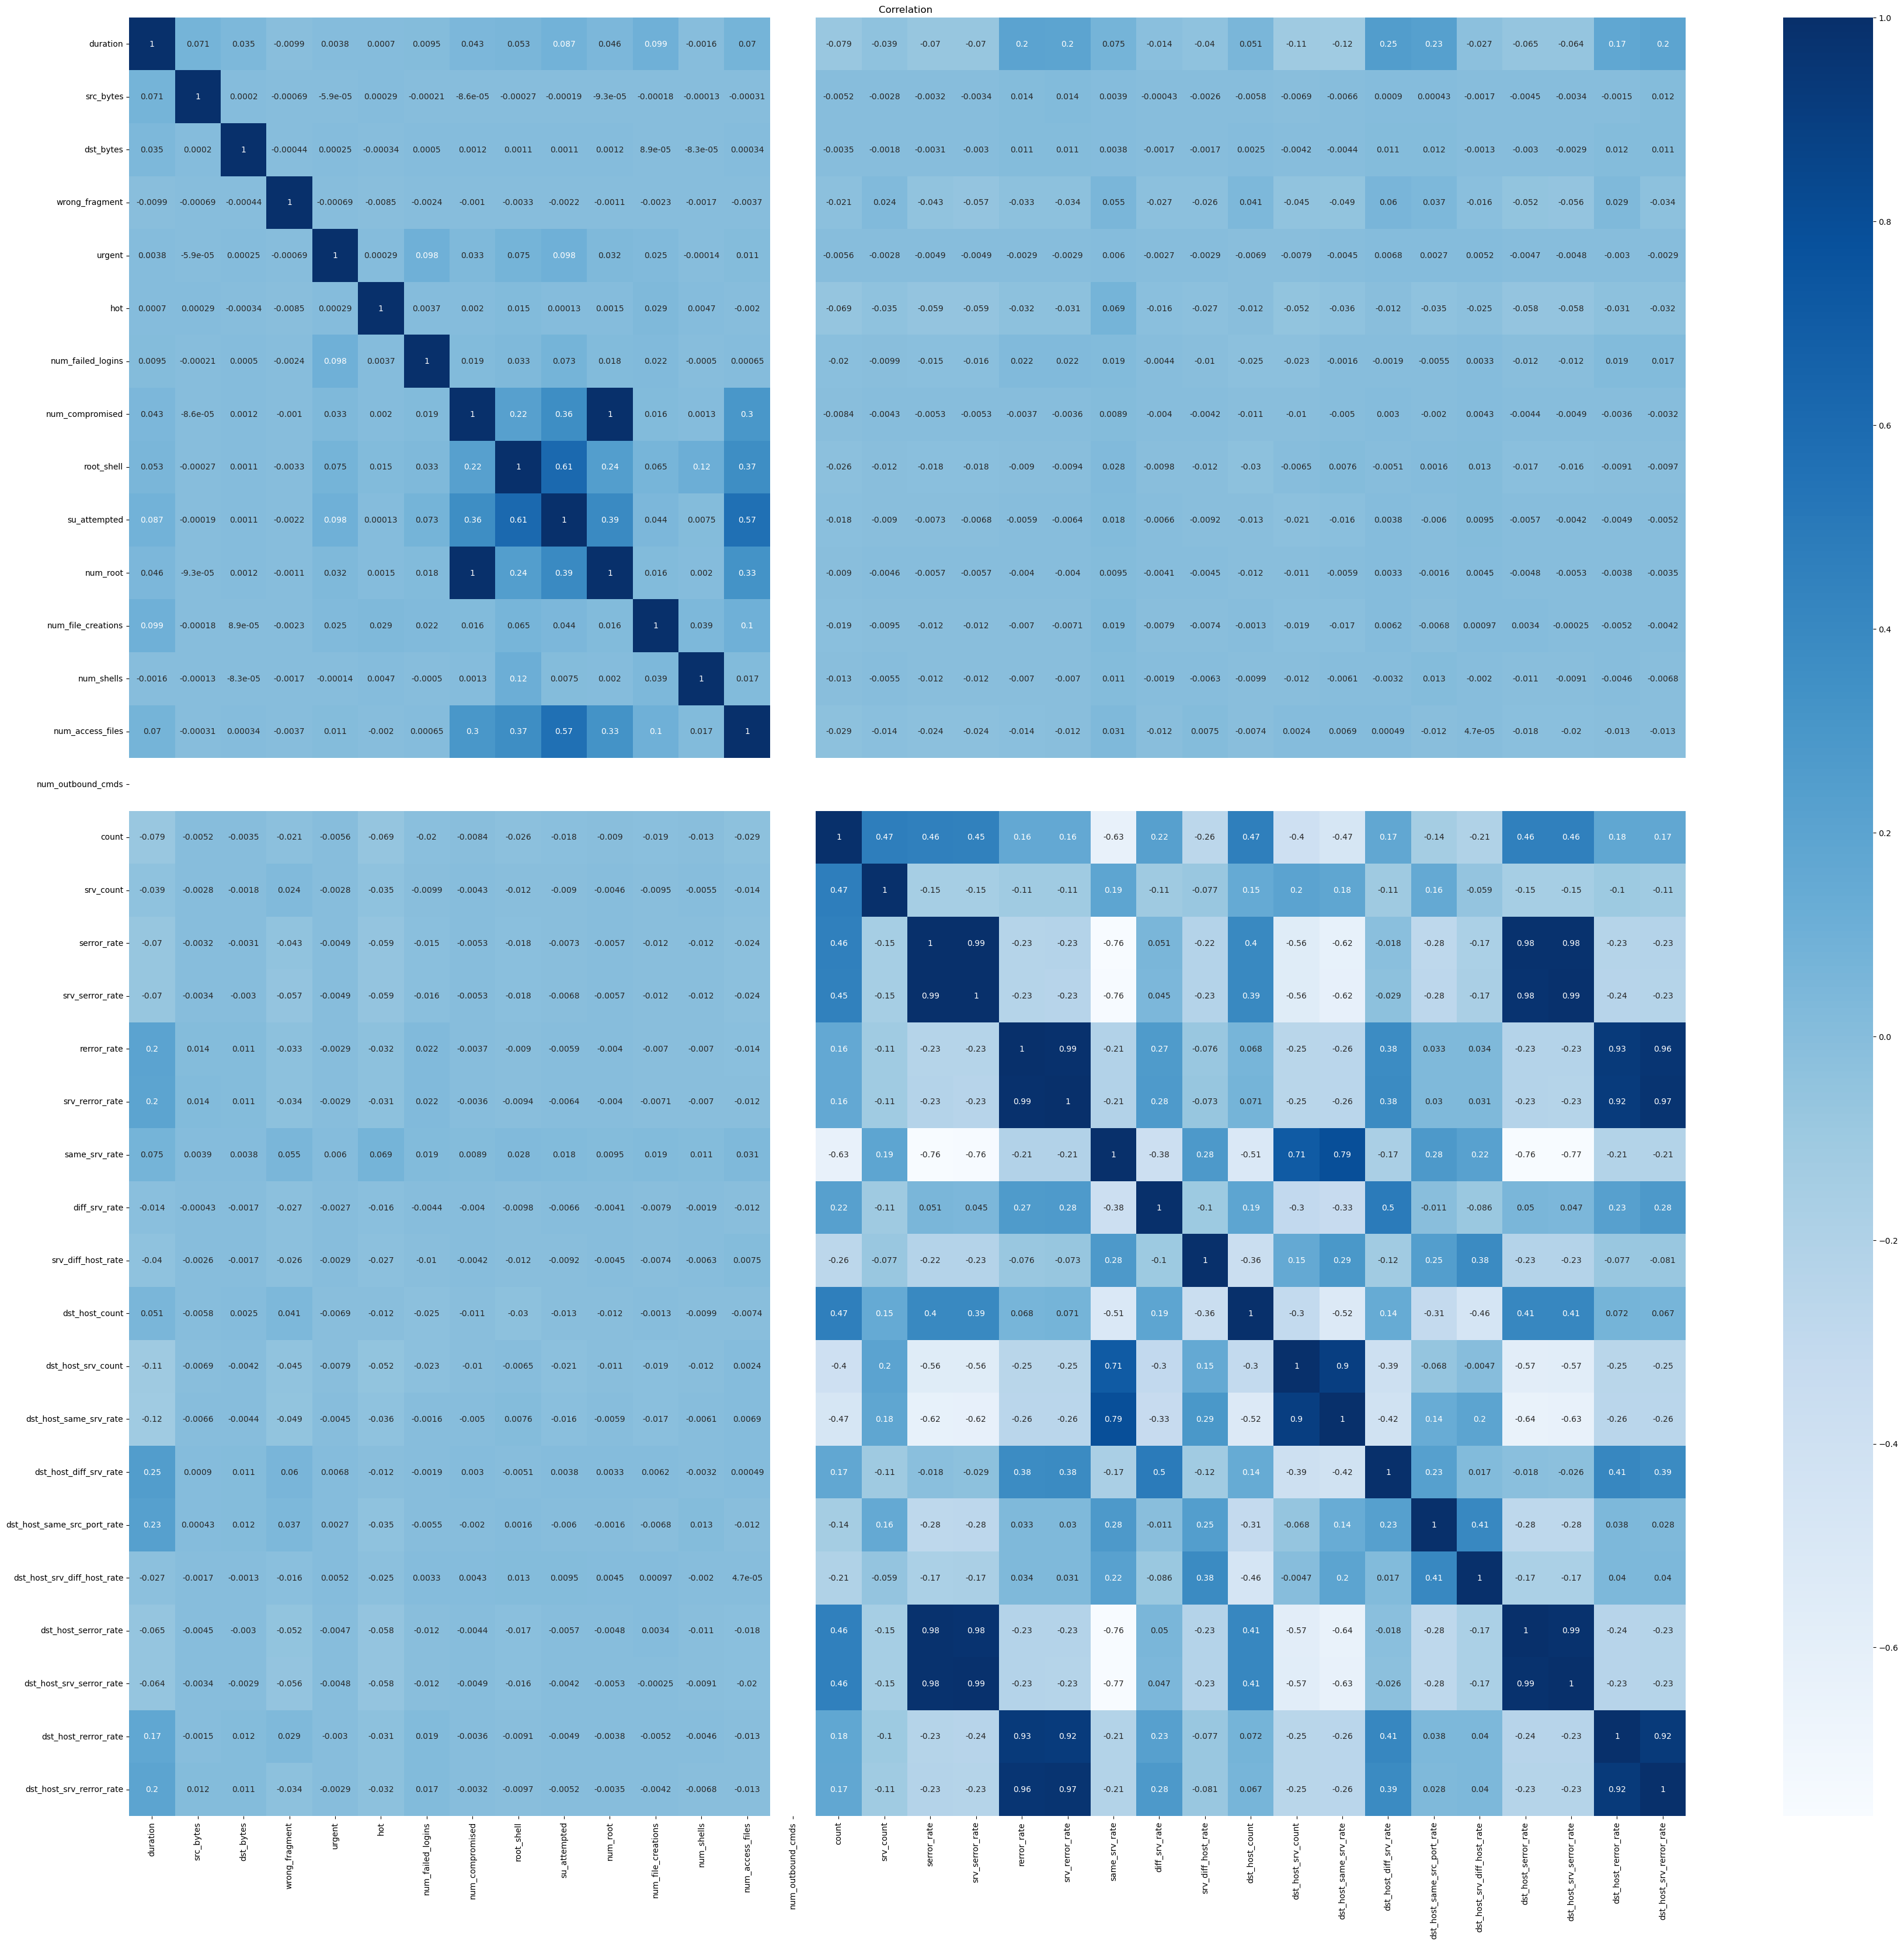

In [20]:
# Correlation matrix for train set
corr_matrix = dataset_train.corr()

# Plot the heatmap
plt.figure(figsize=(43, 40))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation ')
plt.show()

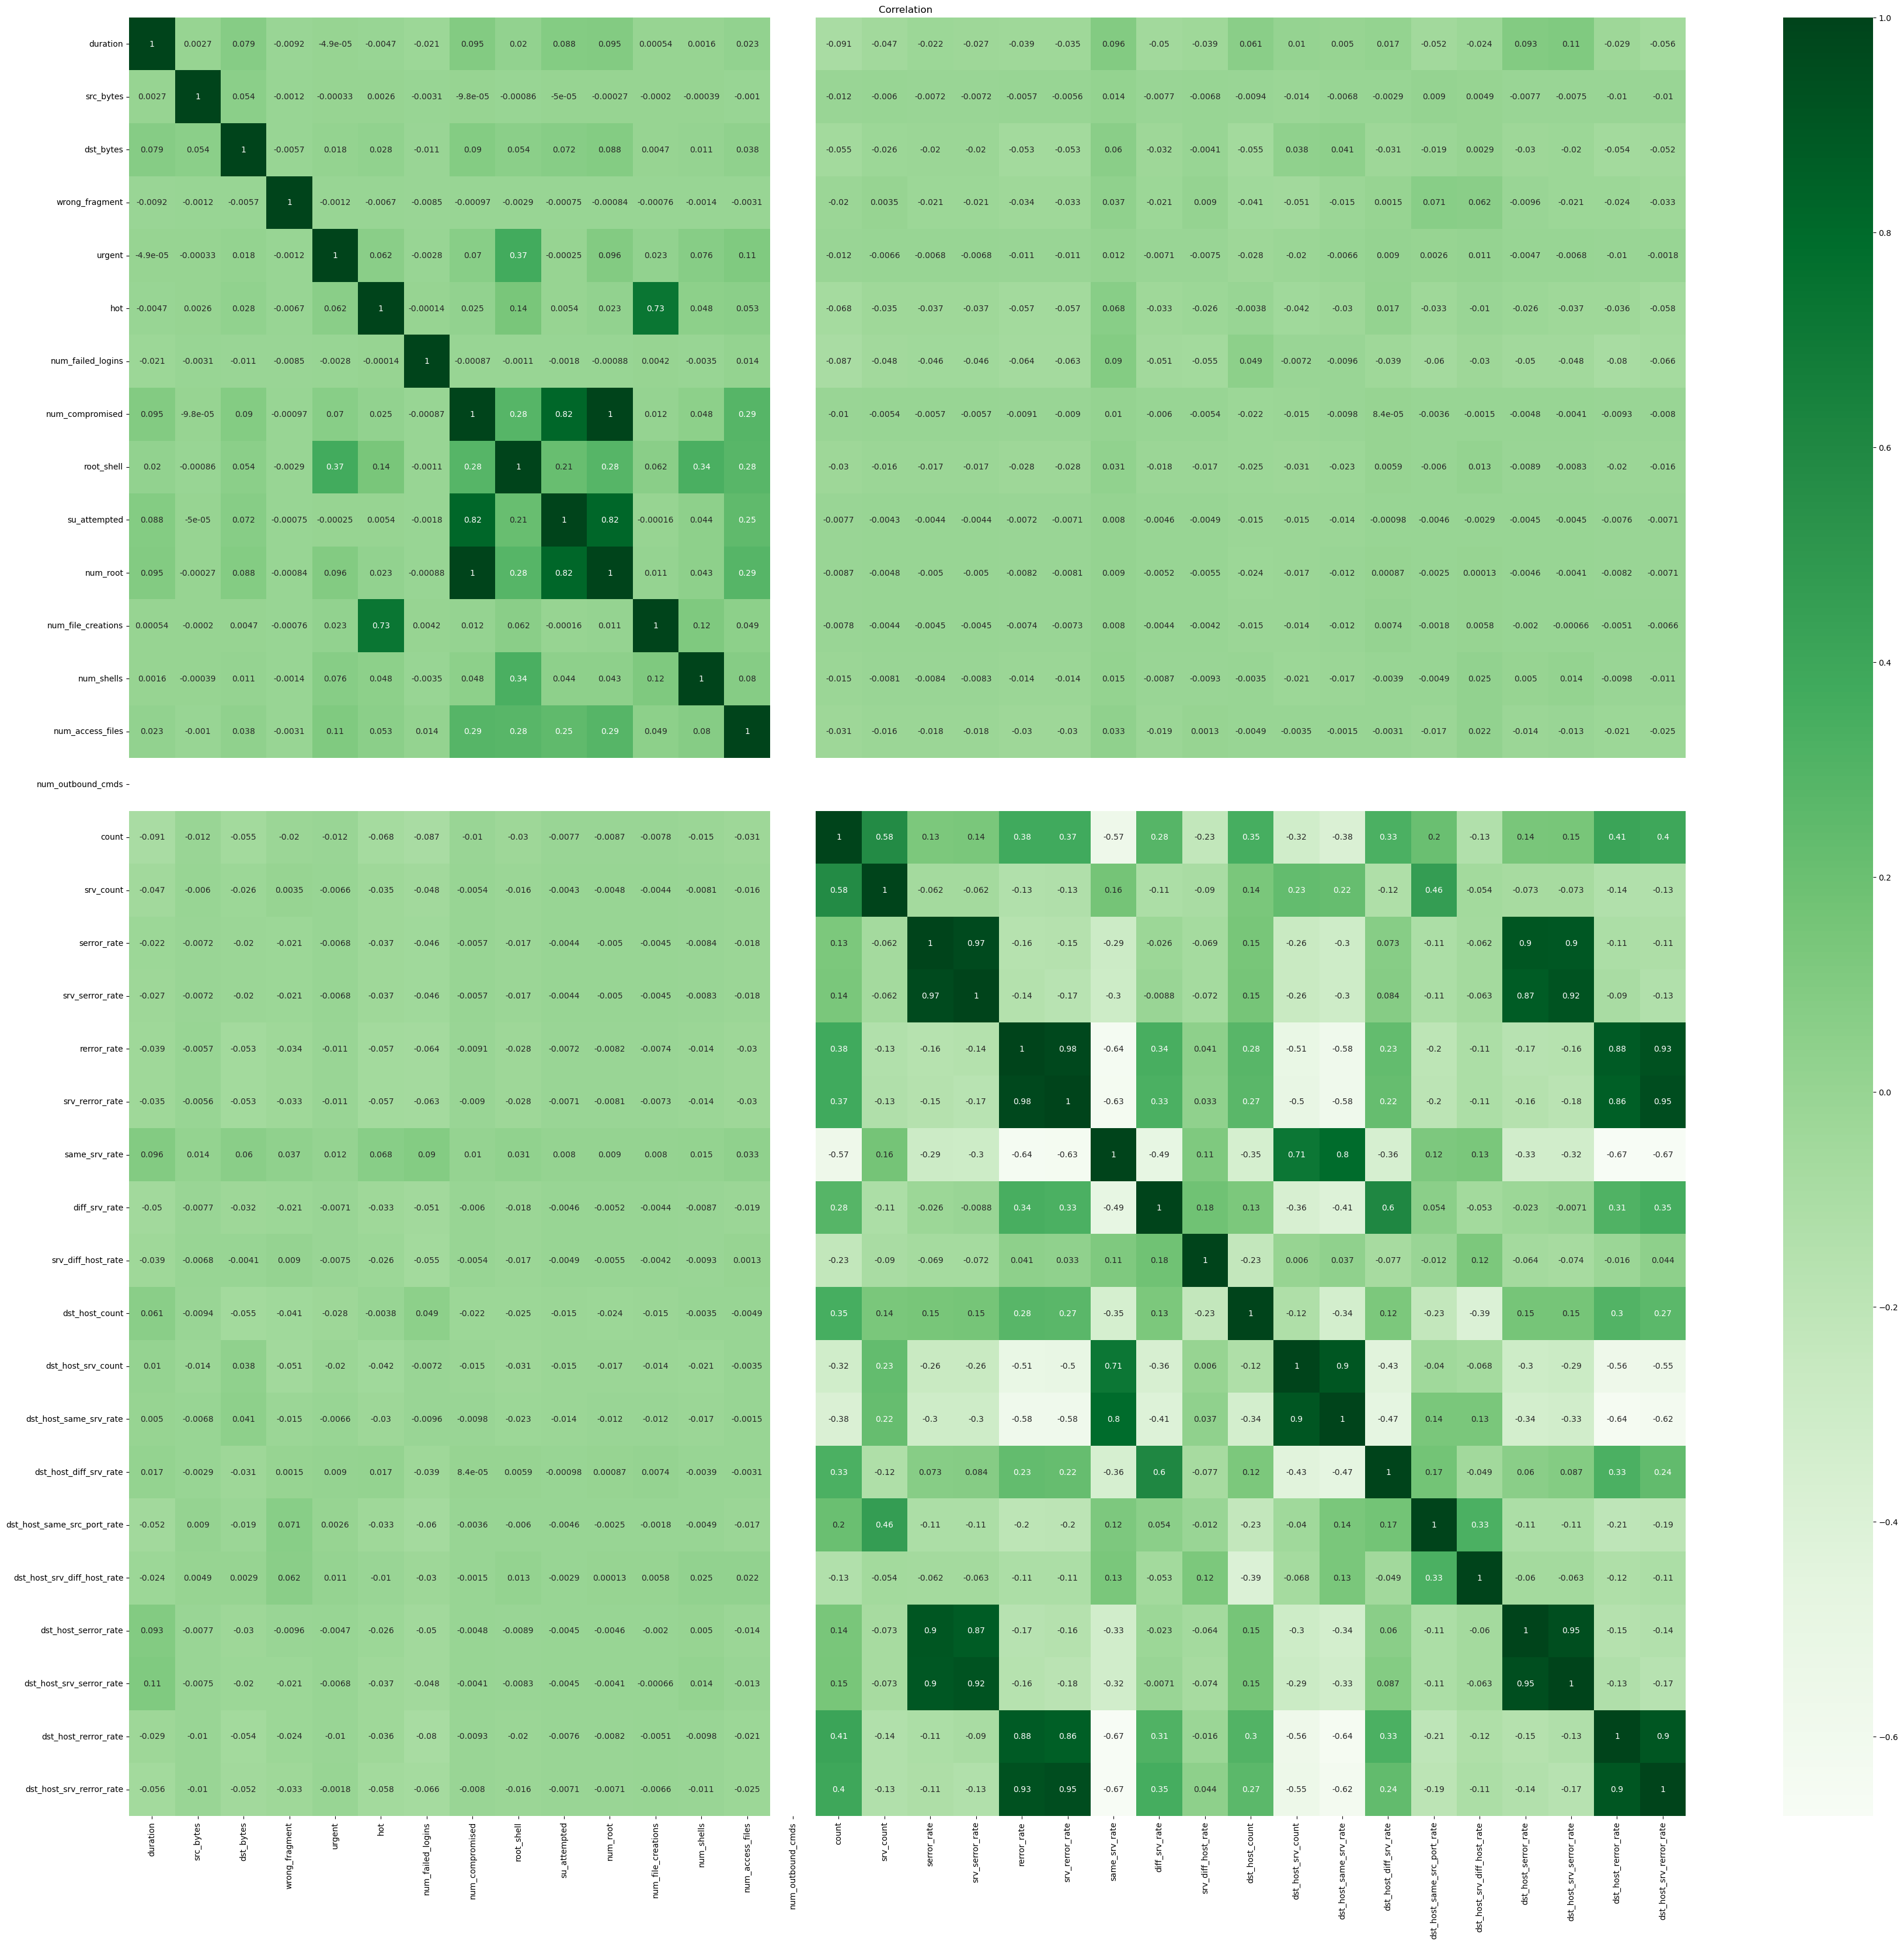

In [21]:
# Correlation matrix for test set
corr_matrix = dataset_test.corr()

# Plot the heatmap
plt.figure(figsize=(43, 40))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation ')
plt.show()

The columns 'num_outbound_cmds'has no correlation => we can drop it

In [22]:
dataset_train = dataset_train.drop(['num_outbound_cmds'], axis=1)
print("The data shape after dropping 'num_outbound_cmds' :",dataset_train.shape)

dataset_test = dataset_test.drop(['num_outbound_cmds'], axis=1)
print("The data shape after dropping 'num_outbound_cmds' :",dataset_test.shape)

The data shape after dropping 'num_outbound_cmds' : (125964, 41)
The data shape after dropping 'num_outbound_cmds' : (22541, 41)


### Droping unuseful columns

#### Train Set

In [23]:
dataset_train = dataset_train.drop(['service', 'flag'], axis=1)
# Assuming 'protocol_type' is a byte string
dataset_train = dataset_train[dataset_train['protocol_type'] == b'tcp']


In [24]:
dataset_train

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
2,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
5,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.0,b'tcp',359.0,375.0,b'0',0.0,0.0,0.0,0.0,b'1',...,255.0,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,b'normal'
125968,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
125970,0.0,b'tcp',2231.0,384.0,b'0',0.0,0.0,0.0,0.0,b'1',...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,b'normal'
125971,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'


In [25]:
dataset_train.protocol_type.unique()

array([b'tcp'], dtype=object)

In [26]:
columns_to_keep = [
    'duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'land', 
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
    'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'class'
]


# Keep only the selected columns
dataset_train  = dataset_train [columns_to_keep]


In [27]:
dataset_train

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,b'tcp',491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',2.0,2.0,0.00,0.00,0.0,b'normal'
2,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',123.0,6.0,1.00,1.00,0.0,b'anomaly'
3,0.0,b'tcp',232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',5.0,5.0,0.20,0.20,0.0,b'normal'
4,0.0,b'tcp',199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',30.0,32.0,0.00,0.00,0.0,b'normal'
5,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',121.0,19.0,0.00,0.00,1.0,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.0,b'tcp',359.0,375.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',3.0,11.0,0.33,0.09,0.0,b'normal'
125968,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',184.0,25.0,1.00,1.00,0.0,b'anomaly'
125970,0.0,b'tcp',2231.0,384.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',1.0,1.0,0.00,0.00,0.0,b'normal'
125971,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',144.0,8.0,1.00,1.00,0.0,b'anomaly'


#### Test Set

In [28]:
dataset_test = dataset_test.drop(['service', 'flag'], axis=1)
# Assuming 'protocol_type' is a byte string
dataset_test = dataset_test[dataset_test['protocol_type'] == b'tcp']

In [29]:
dataset_test

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',12983.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
4,1.0,b'tcp',0.0,15.0,b'0',0.0,0.0,0.0,0.0,b'0',...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
5,0.0,b'tcp',267.0,14515.0,b'0',0.0,0.0,0.0,0.0,b'1',...,255.0,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,b'normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1.0,b'tcp',2599.0,293.0,b'0',0.0,0.0,0.0,0.0,b'1',...,186.0,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,b'anomaly'
22539,0.0,b'tcp',794.0,333.0,b'0',0.0,0.0,0.0,0.0,b'1',...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22540,0.0,b'tcp',317.0,938.0,b'0',0.0,0.0,0.0,0.0,b'1',...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22541,0.0,b'tcp',54540.0,8314.0,b'0',0.0,0.0,2.0,0.0,b'1',...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,b'anomaly'


In [30]:
# Example:
X_test = dataset_test.drop('class', axis=1)
y_test = dataset_test['class']


In [31]:
columns_to_keep = [
    'duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'land', 
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
    'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'class'
]



# Keep only the selected columns
dataset_test  = dataset_test [columns_to_keep]

In [32]:
dataset_test.dropna()
dataset_train.dropna()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,b'tcp',491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',2.0,2.0,0.00,0.00,0.0,b'normal'
2,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',123.0,6.0,1.00,1.00,0.0,b'anomaly'
3,0.0,b'tcp',232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',5.0,5.0,0.20,0.20,0.0,b'normal'
4,0.0,b'tcp',199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',30.0,32.0,0.00,0.00,0.0,b'normal'
5,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',121.0,19.0,0.00,0.00,1.0,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.0,b'tcp',359.0,375.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',3.0,11.0,0.33,0.09,0.0,b'normal'
125968,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',184.0,25.0,1.00,1.00,0.0,b'anomaly'
125970,0.0,b'tcp',2231.0,384.0,b'0',0.0,0.0,0.0,0.0,b'1',...,0.0,0.0,b'0',b'0',1.0,1.0,0.00,0.00,0.0,b'normal'
125971,0.0,b'tcp',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',...,0.0,0.0,b'0',b'0',144.0,8.0,1.00,1.00,0.0,b'anomaly'


In [33]:
#take label column
label= dataset_train['protocol_type']
label_test= dataset_train['protocol_type']
label1= dataset_train['class']
label1_test= dataset_test['class']
# change the label column
newlabel=label.replace({ b'tcp' : 1})
newlabel_test=label_test.replace({ b'tcp' : 1})
newlabel1=label1.replace({ b'normal' : 0, b'anomaly' : 1})
newlabel1_test=label1_test.replace({ b'normal' : 0, b'anomaly' : 1})
# put the new label column back
dataset_train['protocol_type'] = newlabel
dataset_test['protocol_type'] = newlabel_test
dataset_train['class'] = newlabel1
dataset_test['class'] = newlabel1_test
dataset_train.protocol_type.unique()
dataset_test.protocol_type.unique()
dataset_train['class'].unique()
dataset_test['class'].unique()



dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102689 entries, 0 to 125972
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration            102689 non-null  float64
 1   protocol_type       102689 non-null  int64  
 2   src_bytes           102689 non-null  float64
 3   dst_bytes           102689 non-null  float64
 4   land                102689 non-null  object 
 5   wrong_fragment      102689 non-null  float64
 6   urgent              102689 non-null  float64
 7   hot                 102689 non-null  float64
 8   num_failed_logins   102689 non-null  float64
 9   logged_in           102689 non-null  object 
 10  num_compromised     102689 non-null  float64
 11  root_shell          102689 non-null  float64
 12  su_attempted        102689 non-null  float64
 13  num_root            102689 non-null  float64
 14  num_file_creations  102689 non-null  float64
 15  num_shells          102689 non-nul

In [34]:
dataset_train  = dataset_train.drop('protocol_type', axis=1)

In [35]:
dataset_test = dataset_test.drop('protocol_type', axis=1)

In [36]:
X_train = dataset_train

In [37]:
X_test = dataset_test

## d_raw

In [38]:
d_raw_train=dataset_train
d_raw_test=dataset_test

In [39]:
d_raw_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',2.0,2.0,0.00,0.00,0.0,0
2,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',123.0,6.0,1.00,1.00,0.0,1
3,0.0,232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',5.0,5.0,0.20,0.20,0.0,0
4,0.0,199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',30.0,32.0,0.00,0.00,0.0,0
5,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',121.0,19.0,0.00,0.00,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.0,359.0,375.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',3.0,11.0,0.33,0.09,0.0,0
125968,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',184.0,25.0,1.00,1.00,0.0,1
125970,0.0,2231.0,384.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.00,0.00,0.0,0
125971,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',144.0,8.0,1.00,1.00,0.0,1


In [40]:
d_raw_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',229.0,10.0,0.0,0.00,1.0,1
1,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',136.0,1.0,0.0,0.00,1.0,1
2,2.0,12983.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.00,0.0,0
4,1.0,0.0,15.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',1.0,8.0,0.0,0.12,1.0,1
5,0.0,267.0,14515.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',4.0,4.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1.0,2599.0,293.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.00,0.0,1
22539,0.0,794.0,333.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.00,0.0,0
22540,0.0,317.0,938.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',2.0,11.0,0.0,0.00,0.0,0
22541,0.0,54540.0,8314.0,b'0',0.0,0.0,2.0,0.0,b'1',1.0,...,0.0,0.0,b'0',b'0',5.0,10.0,0.0,0.00,0.0,1


In [41]:
d_raw = pd.concat([d_raw_train, d_raw_test], axis=0, ignore_index=True)
d_raw

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',123.0,6.0,1.0,1.0,0.0,1
2,0.0,232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',5.0,5.0,0.2,0.2,0.0,0
3,0.0,199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',30.0,32.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',121.0,19.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121561,1.0,2599.0,293.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,1
121562,0.0,794.0,333.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0
121563,0.0,317.0,938.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',2.0,11.0,0.0,0.0,0.0,0
121564,0.0,54540.0,8314.0,b'0',0.0,0.0,2.0,0.0,b'1',1.0,...,0.0,0.0,b'0',b'0',5.0,10.0,0.0,0.0,0.0,1


In [42]:
d_raw = d_raw.drop_duplicates()
d_raw

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',123.0,6.0,1.0,1.0,0.0,1
2,0.0,232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',5.0,5.0,0.2,0.2,0.0,0
3,0.0,199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',30.0,32.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',121.0,19.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121556,0.0,264.0,14839.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0
121557,0.0,274.0,1623.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0
121559,0.0,280.0,6087.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',3.0,3.0,0.0,0.0,0.0,0
121562,0.0,794.0,333.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0


In [43]:
d_raw.dropna()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,491.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',123.0,6.0,1.0,1.0,0.0,1
2,0.0,232.0,8153.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',5.0,5.0,0.2,0.2,0.0,0
3,0.0,199.0,420.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',30.0,32.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,...,0.0,0.0,b'0',b'0',121.0,19.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121556,0.0,264.0,14839.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0
121557,0.0,274.0,1623.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0
121559,0.0,280.0,6087.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',3.0,3.0,0.0,0.0,0.0,0
121562,0.0,794.0,333.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,...,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0


## d_raw_probs

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

d_raw_train.dropna()
d_raw_test.dropna()
X_train_gm = d_raw_train
X_test_gmm = d_raw_test
X_train=d_raw_train

In [45]:
columns = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
    'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate','class'
]

In [46]:
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=24)
gmm.fit(X_train_gm)
train_probabilities = gmm.predict_proba(X_train_gm)
d_raw_probs_train = pd.DataFrame(train_probabilities, columns=columns)
d_raw_probs_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,1.723834e-278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,2.113365e-46,0.0,1.441336e-29
1,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.115161e-16,0.0,0.000000e+00
2,4.653576e-154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.022174e-29,0.0,0.000000e+00
3,1.733894e-234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,8.913991e-46,0.0,1.471968e-24
4,6.363217e-41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,8.599325e-132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,5.196488e-29,0.0,2.486474e-131
102685,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.585353e-15,0.0,0.000000e+00
102686,2.375579e-235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999990,0.0,0.0,0.000010,0.0,0.0,0.0,1.006504e-41,0.0,3.749428e-17
102687,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.589771e-16,0.0,0.000000e+00


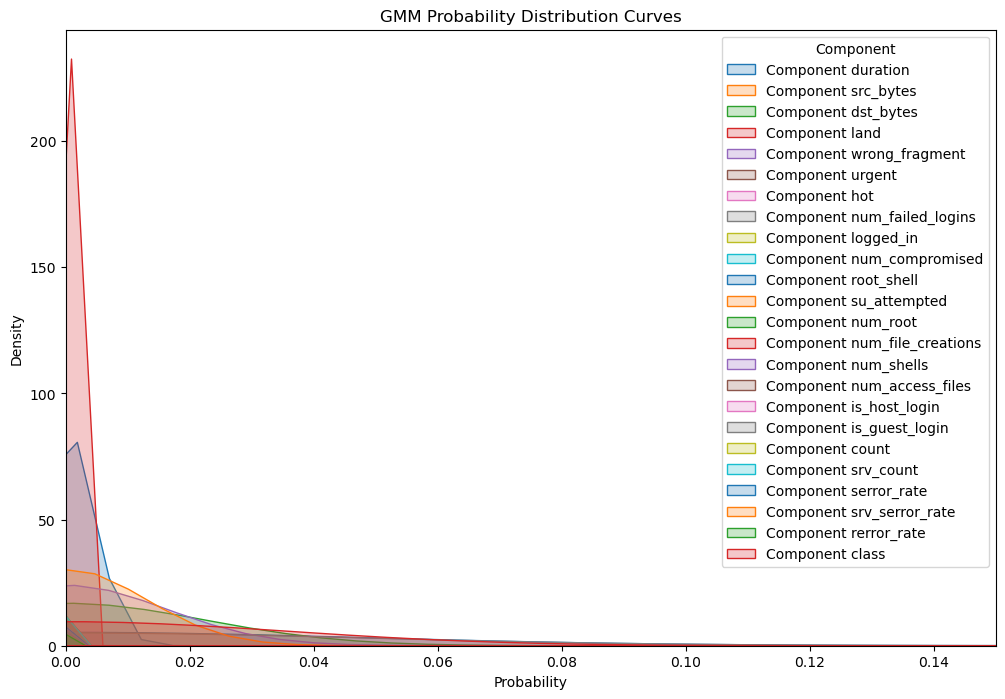

In [47]:
plt.figure(figsize=(12, 8))
for col in d_raw_probs_train.columns:
    sns.kdeplot(d_raw_probs_train[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

In [48]:
X_test=d_raw_test
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_test)
train_probabilities = gmm.predict_proba(X_test)
d_raw_probs_test = pd.DataFrame(train_probabilities, columns=columns)
d_raw_probs_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
1,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,6.178884e-29,0.0,1.000000e+00,0.0
3,4.655666e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,1.855769e-228,1.0
4,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.111991e-27,0.0,1.0,0.000000e+00,0.0,3.287357e-94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.959833e-88,0.0,0.0,0.000000e+00,0.0,1.000000e+00,0.0
18873,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.639290e-30,0.0,1.0,0.000000e+00,0.0,9.203628e-19,0.0
18874,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.640294e-28,0.0,1.0,0.000000e+00,0.0,5.365684e-26,0.0
18875,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,6.401840e-215,0.0


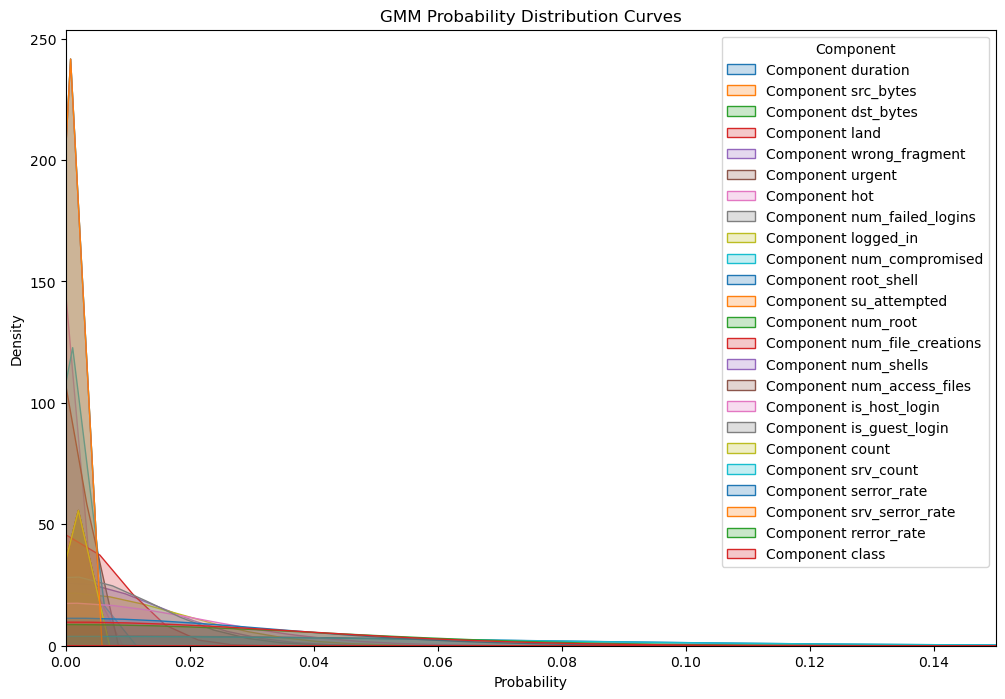

In [49]:
plt.figure(figsize=(12, 8))
for col in d_raw_probs_test.columns:
    sns.kdeplot(d_raw_probs_test[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

## d_raw_pca

In [50]:
n_components = 24

pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X_train)

d_raw_pca_train = pd.DataFrame(X_pca, columns=columns)
d_raw_pca_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,-55375.861782,-24239.596504,-278.866950,-80.342129,-0.528051,-6.780311,-0.554867,0.029539,-0.054494,-0.042633,...,0.004799,-0.015267,0.012234,0.012094,-0.002616,0.000716,-0.000692,-0.000351,-0.000012,-5.247882e-17
1,-55866.861771,-24239.472765,-279.203824,40.694649,-0.213397,-3.888798,-0.274774,0.029716,-0.947425,0.026337,...,0.000025,-0.001476,-0.000578,-0.001193,-0.000175,-0.000056,-0.000028,-0.001050,-0.000004,1.512346e-18
2,-55632.806882,-16086.531489,-279.052537,-77.316772,-0.525713,-3.802490,-0.470555,0.012133,0.123398,0.015308,...,0.008813,0.001347,-0.004179,-0.002529,-0.000063,-0.000466,0.000110,-0.000567,-0.000027,5.692737e-18
3,-55667.755912,-23819.522926,-278.956868,-52.072842,-0.511694,22.958429,0.182935,-0.021864,0.482183,-0.004284,...,-0.000514,0.001154,-0.000632,0.000851,-0.000823,-0.000056,0.000026,0.000532,0.000002,-1.256687e-17
4,-55866.861771,-24239.472766,-279.201575,38.809294,-0.244179,9.114529,0.021833,0.016590,0.368886,-0.132304,...,-0.008555,-0.003397,0.001724,0.000591,-0.001517,0.000459,0.000017,0.000219,0.000017,1.772096e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,-55507.767256,-23864.563249,-278.876694,-79.261960,-0.542762,2.213739,-0.338063,0.006907,0.100875,0.014522,...,0.007916,0.002984,-0.006649,-0.172790,-0.000254,-0.000628,0.000274,-0.000038,-0.000019,3.167156e-18
102685,-55866.861777,-24239.472772,-279.386130,101.864217,-0.087784,14.546165,0.253021,-0.002645,-0.624002,0.029739,...,-0.003345,0.001162,0.000230,0.000160,0.000467,0.000033,0.000116,-0.000344,0.000015,-2.075734e-18
102686,-53635.765048,-23856.035070,-278.927074,-81.354333,-0.528575,-7.765294,-0.565219,0.014789,0.331818,-0.000792,...,0.006469,-0.001948,-0.001972,0.001508,-0.001543,-0.000255,-0.000201,-0.000195,-0.000030,4.429257e-18
102687,-55866.861773,-24239.472768,-279.265325,61.711498,-0.161307,-2.081738,-0.195861,0.022972,-0.835381,0.028564,...,-0.000023,-0.000950,-0.000497,-0.000458,-0.000039,-0.000058,-0.000011,-0.000888,-0.000002,1.989175e-18


In [51]:
y=dataset_test
n_components = 24

pca = PCA(n_components=n_components)
X_pca_test = pca.fit_transform(y)
d_raw_pca_test = pd.DataFrame(X_pca_test, columns=columns)
d_raw_pca_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,-12325.102153,-2419.865802,-247.273030,160.802053,-0.790196,0.016512,-0.020082,-0.068077,-0.006951,-0.473444,...,-0.015742,0.001372,-0.004655,0.001530,-0.000089,-0.000015,0.000199,0.000488,0.000033,-1.528067e-16
1,-12325.101892,-2419.840167,-246.653981,67.766861,-9.388197,-0.020543,-0.112118,-0.388461,0.008098,-0.563064,...,-0.008073,0.000735,-0.007068,0.002285,-0.000147,0.000077,0.000206,-0.000467,0.000035,-1.661357e-17
2,657.861267,-2450.884719,-243.685820,-67.190650,-8.799867,0.034735,-0.213205,-0.038545,0.060974,0.114885,...,-0.200639,0.006701,0.015639,0.003406,-0.000129,0.001634,0.002378,-0.000482,0.000223,5.022616e-16
3,-12325.065588,-2404.798333,-244.843812,-67.187239,-1.805063,0.090681,-0.168737,-0.928169,0.025635,-0.716359,...,-0.003153,0.003794,0.074062,-0.016327,-0.000293,-0.000028,0.000502,-0.001411,0.000084,-1.090580e-17
4,-12023.341656,12094.326029,-319.764554,-60.724240,-5.696180,-0.550838,-0.185658,0.537777,0.030739,0.146650,...,0.016325,-0.008606,-0.001699,0.001080,0.000093,0.000557,-0.000074,-0.000207,-0.000076,1.298798e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,-9725.407286,-2133.027059,-246.248292,-66.145480,-7.803891,0.030145,-0.156664,-0.083785,-0.004198,-0.060868,...,-0.023148,-0.020728,0.007243,-0.018962,0.001095,-0.002835,-0.004503,-0.000076,-0.000139,2.226824e-18
18873,-11530.306321,-2088.709871,-247.455741,-67.152656,-8.797055,0.021696,-0.187945,0.564048,0.026714,0.164998,...,0.023262,-0.008435,-0.002401,0.001838,-0.000157,0.000580,-0.000174,-0.000333,-0.000095,-1.277307e-17
18874,-12005.856099,-1482.577551,-250.554763,-65.964768,1.202683,0.078710,-0.149135,0.546743,0.023409,0.123921,...,0.010349,-0.006880,-0.000153,0.001482,-0.000201,0.000464,-0.000030,-0.000023,-0.000067,-9.828291e-18
18875,42234.652506,5763.450757,-287.844773,-61.073508,0.240271,0.438727,1.547902,-0.130192,-0.808795,-0.196431,...,0.097338,-0.033507,0.005813,-0.026574,0.019958,0.017872,-0.005703,0.000229,0.000675,6.584274e-18


## d_raw_pca_probs

In [52]:
X_train=d_raw_pca_train
n_components = 24
gmm = GaussianMixture(n_components=n_components,reg_covar=1e3, random_state=42)
gmm.fit(X_train)
train_probabilities = gmm.predict_proba(X_train)
d_raw_pca_probs_train = pd.DataFrame(train_probabilities, columns=columns)
d_raw_pca_probs_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,4.466459e-47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.881575e-01,0.0,7.118044e-01,0.0,0.0,1.298178e-05,0.0,0.0,2.499231e-05
1,9.999999e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.337826e-09,0.0,1.080015e-07,0.0,0.0,7.763834e-13,0.0,0.0,4.883965e-12
2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.999736e-01,0.0,1.337482e-16,0.0,0.0,2.405748e-07,0.0,0.0,2.614540e-05
3,2.147063e-41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.927538e-01,0.0,7.230107e-03,0.0,0.0,1.150704e-07,0.0,0.0,1.600430e-05
4,9.999999e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.170659e-08,0.0,1.257529e-07,0.0,0.0,8.939171e-13,0.0,0.0,6.320142e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,1.955357e-52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.805707e-01,0.0,1.941416e-02,0.0,0.0,3.445137e-07,0.0,0.0,1.483900e-05
102685,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.833030e-12,0.0,3.445520e-11,0.0,0.0,9.624137e-17,0.0,0.0,8.459296e-16
102686,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.631538e-182,0.0,9.999924e-01,0.0,0.0,7.460959e-06,0.0,0.0,1.372932e-106
102687,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.134961e-10,0.0,9.630641e-09,0.0,0.0,5.270946e-14,0.0,0.0,3.511025e-13


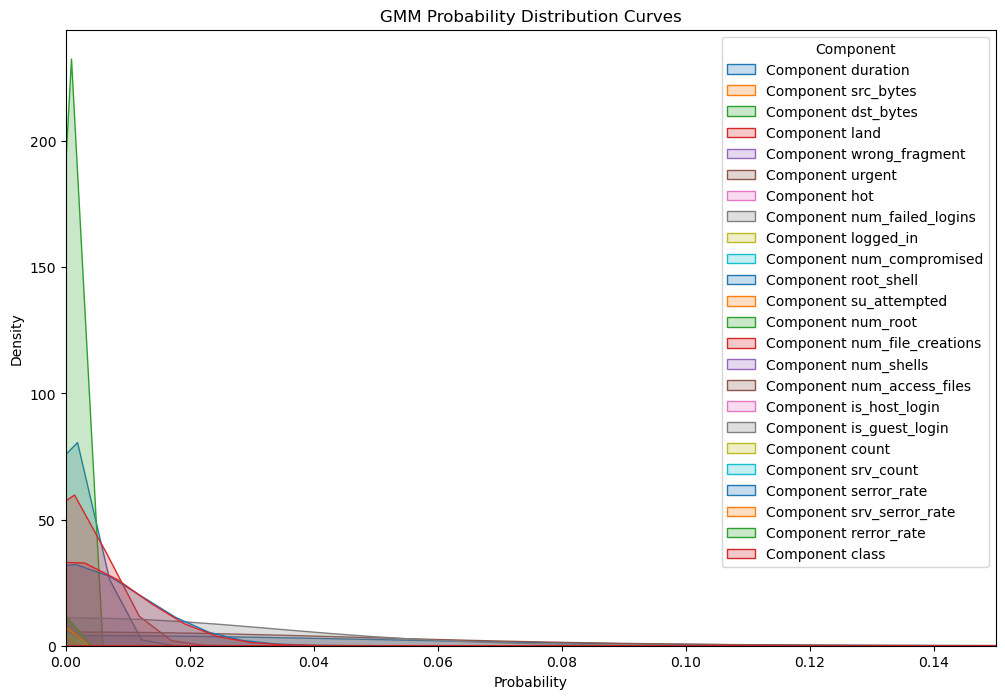

In [53]:
plt.figure(figsize=(12, 8))
for col in d_raw_pca_probs_train.columns:
    sns.kdeplot(d_raw_pca_probs_train[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

In [54]:
X_test=d_raw_pca_test
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_test)
train_probabilities = gmm.predict_proba(X_test)
d_raw_pca_probs_test = pd.DataFrame(train_probabilities, columns=columns)
d_raw_pca_probs_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
1,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,6.178885e-29,0.0,1.000000e+00,0.0
3,4.655666e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,1.855769e-228,1.0
4,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.111991e-27,0.0,1.0,0.000000e+00,0.0,3.287358e-94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.959834e-88,0.0,0.0,0.000000e+00,0.0,1.000000e+00,0.0
18873,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.639292e-30,0.0,1.0,0.000000e+00,0.0,9.203630e-19,0.0
18874,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.640295e-28,0.0,1.0,0.000000e+00,0.0,5.365685e-26,0.0
18875,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,6.401841e-215,0.0


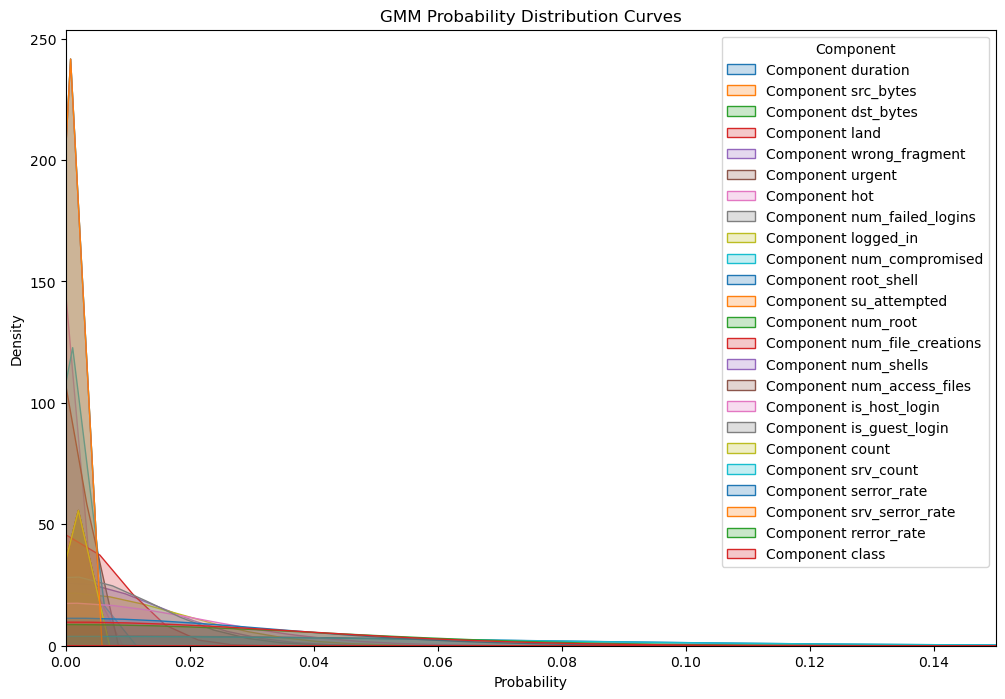

In [55]:
plt.figure(figsize=(12, 8))
for col in d_raw_pca_probs_test.columns:
    sns.kdeplot(d_raw_pca_probs_test[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

# Normalization

### Train Set

In [56]:
X=dataset_train
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)
norm_train_data = pd.DataFrame(X_sc, columns=X.columns)
norm_train_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,1.0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.009785,0.030675,0.20,0.20,0.0,0.0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.058708,0.196319,0.00,0.00,0.0,0.0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.005871,0.067485,0.33,0.09,0.0,0.0
102685,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,1.0
102686,0.0,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.001957,0.006135,0.00,0.00,0.0,0.0
102687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,1.0


### Test Set

In [57]:
X_test=dataset_test
sc = MinMaxScaler()
X_sc_test = sc.fit_transform(X_test)
norm_test_data = pd.DataFrame(X_sc_test, columns=X_test.columns)
norm_test_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.447059,0.060403,0.0,0.00,1.0,1.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.264706,0.000000,0.0,0.00,1.0,1.0
2,0.000035,0.000207,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0
3,0.000017,0.000000,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.046980,0.0,0.12,1.0,1.0
4,0.000000,0.000004,0.010784,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.005882,0.020134,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,0.000017,0.000041,0.000218,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.001961,0.006711,0.0,0.00,0.0,1.0
18873,0.000000,0.000013,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0
18874,0.000000,0.000005,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.001961,0.067114,0.0,0.00,0.0,0.0
18875,0.000000,0.000868,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,0.0,0.0,0.007843,0.060403,0.0,0.00,0.0,1.0


## d_norm

In [58]:
d_norm_train=norm_train_data
d_norm_test=norm_test_data

In [59]:
d_norm_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,1.0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.009785,0.030675,0.20,0.20,0.0,0.0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.058708,0.196319,0.00,0.00,0.0,0.0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.005871,0.067485,0.33,0.09,0.0,0.0
102685,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,1.0
102686,0.0,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.001957,0.006135,0.00,0.00,0.0,0.0
102687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,1.0


In [60]:
d_norm_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.447059,0.060403,0.0,0.00,1.0,1.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.264706,0.000000,0.0,0.00,1.0,1.0
2,0.000035,0.000207,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0
3,0.000017,0.000000,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.046980,0.0,0.12,1.0,1.0
4,0.000000,0.000004,0.010784,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.005882,0.020134,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,0.000017,0.000041,0.000218,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.001961,0.006711,0.0,0.00,0.0,1.0
18873,0.000000,0.000013,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0
18874,0.000000,0.000005,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.001961,0.067114,0.0,0.00,0.0,0.0
18875,0.000000,0.000868,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,...,0.0,0.0,0.0,0.0,0.007843,0.060403,0.0,0.00,0.0,1.0


## d_norm_probs

In [61]:
X_train=d_norm_train
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train)
train_probabilities = gmm.predict_proba(X_train)
d_norm_probs_train = pd.DataFrame(train_probabilities, columns=columns)
d_norm_probs_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.000000e+00,0.000000,0.000000,1.0,1.159181e-25,0.0,0.000000e+00,0.000000,0.0,0.0,...,3.498006e-08,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
1,0.000000e+00,0.000058,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.999942,0.0,0.0,...,0.000000e+00,0.000000,3.860864e-280,3.612756e-10,0.000000,0.000000e+00,0.0,3.567186e-35,0.0,0.000000
2,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00,0.0,2.806463e-24,0.000000,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
3,4.499437e-43,0.000000,0.000000,0.0,0.000000e+00,0.0,3.361413e-34,0.000000,0.0,0.0,...,0.000000e+00,0.000219,0.000000e+00,0.000000e+00,0.999781,4.945598e-19,0.0,0.000000e+00,0.0,0.000000
4,0.000000e+00,0.000000,0.001288,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.000000e+00,0.000000,1.830379e-309,2.771545e-25,0.000000,0.000000e+00,0.0,2.494295e-142,0.0,0.998712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,1.221402e-279,0.000000,0.000000,0.0,0.000000e+00,0.0,9.036210e-28,0.000000,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
102685,0.000000e+00,0.006935,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.993065,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,6.199109e-10,0.000000,0.000000e+00,0.0,3.042325e-271,0.0,0.000000
102686,2.847667e-23,0.000000,0.000000,0.0,0.000000e+00,0.0,5.984910e-35,0.000000,0.0,0.0,...,0.000000e+00,0.995076,0.000000e+00,0.000000e+00,0.004924,2.445414e-20,0.0,0.000000e+00,0.0,0.000000
102687,0.000000e+00,0.001031,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.998969,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,2.958767e-10,0.000000,0.000000e+00,0.0,4.557617e-46,0.0,0.000000


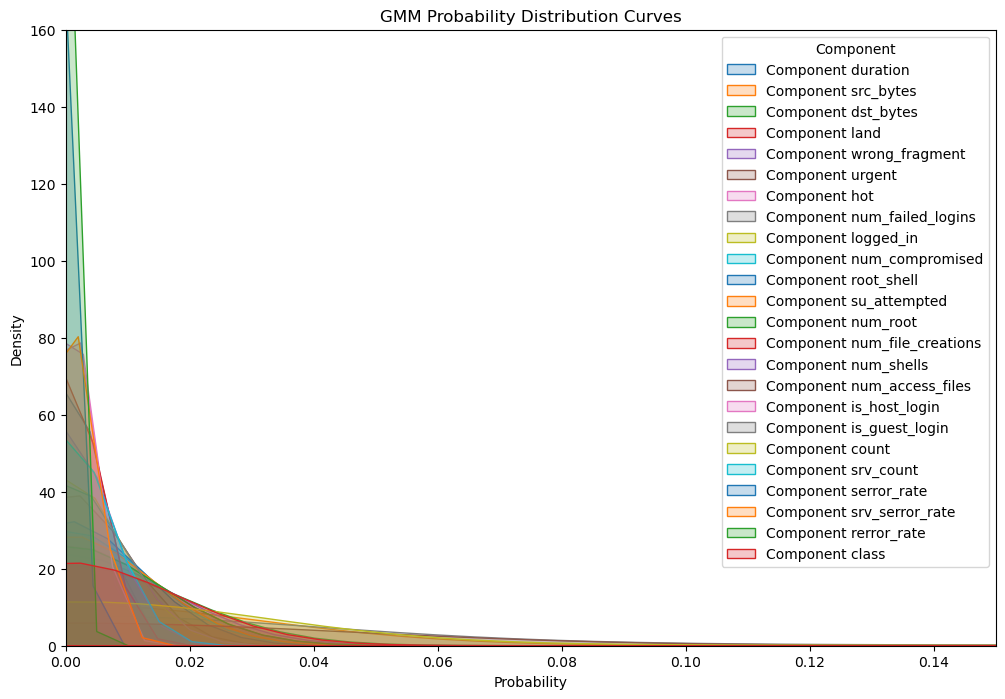

In [62]:
plt.figure(figsize=(12, 8))
for col in d_norm_probs_train.columns:
    sns.kdeplot(d_norm_probs_train[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.ylim(0,160)
plt.show()

In [63]:
X_test=d_norm_test
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_test)
train_probabilities = gmm.predict_proba(X_test)
d_norm_probs_test = pd.DataFrame(train_probabilities, columns=columns)
d_norm_probs_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.000000e+00,0.0,0.033076,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,9.669237e-01,...,0.000000e+00,0.0,4.850467e-09,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1,0.000000e+00,0.0,0.989431,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.045271e-02,...,0.000000e+00,0.0,1.088773e-08,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.000000e+00,...,1.114849e-07,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
3,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,4.970690e-07,0.999997,0.0,0.0,0.0,2.034070e-06,0.0,0.0
4,1.735476e-18,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,9.501877e-58,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,0.000000e+00,0.0,0.000000,0.0,9.999996e-01,3.617295e-07,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
18873,4.580741e-19,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,2.100551e-33,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,0.0,0.0
18874,1.017463e-18,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,8.604221e-34,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,0.0,0.0
18875,0.000000e+00,0.0,0.000000,0.0,1.771372e-71,1.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0


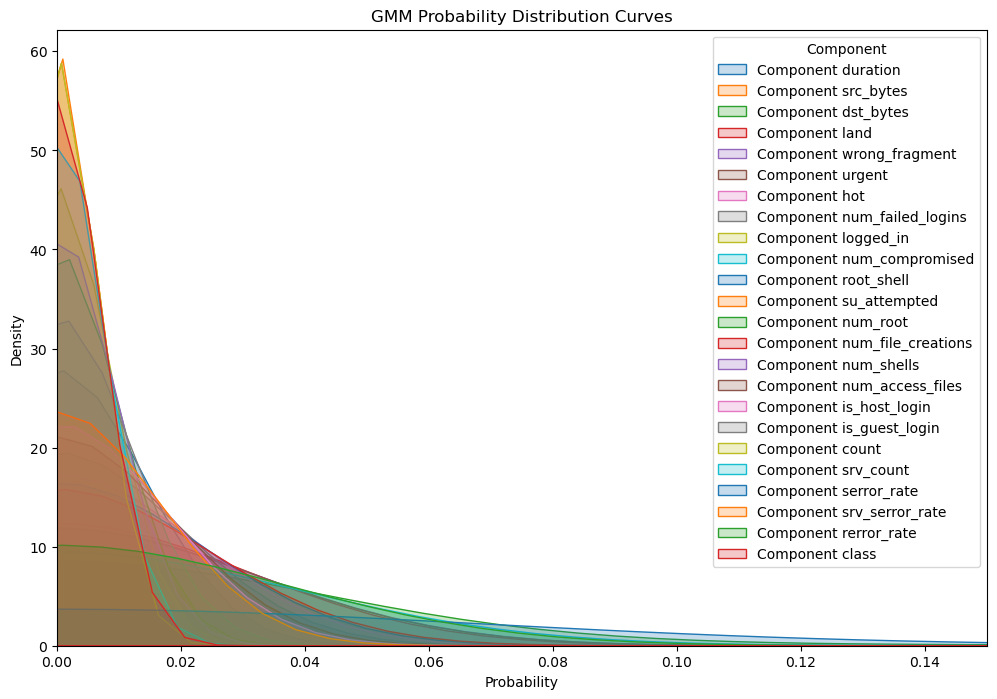

In [64]:
plt.figure(figsize=(12, 8))
for col in d_norm_probs_test.columns:
    sns.kdeplot(d_norm_probs_test[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

# Principal Component Analysis

### Train Set

In [65]:
n_components = 24
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X_sc)

df_pca = pd.DataFrame(data=X_pca, columns=columns)
train_final = df_pca

# Visualize the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for each component: {explained_var_ratio}")
print(f"Total Explained Variance: {np.sum(explained_var_ratio)}")


Explained Variance Ratio for each component: [7.15900408e-01 2.02919723e-01 3.34510922e-02 1.73138668e-02
 1.05652593e-02 9.56942569e-03 3.37448344e-03 2.72322962e-03
 1.71223298e-03 1.22028611e-03 3.19342563e-04 2.14351053e-04
 2.01914672e-04 1.37717054e-04 1.26951993e-04 9.09513130e-05
 7.74195600e-05 2.41707729e-05 1.94778345e-05 1.89120937e-05
 1.01859396e-05 8.59185897e-06 6.26184789e-09 1.83014793e-35]
Total Explained Variance: 1.0000000000000002


In [66]:
train_final

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,-0.367113,0.195428,-0.592401,-0.010707,0.274464,-0.391775,0.011901,-0.022410,0.004934,0.012492,...,-0.000185,-0.002284,-0.002355,-1.190464e-04,-0.000053,-0.000056,-0.000026,-0.000012,-1.148177e-05,-4.321820e-19
1,1.147462,-0.250102,-0.027437,-0.089533,-0.011982,0.003408,-0.007527,-0.023777,-0.001182,-0.001136,...,-0.000067,-0.000236,-0.000144,-8.078110e-06,-0.000018,0.000011,-0.000010,-0.000004,1.609495e-06,1.245472e-20
2,-0.668816,-0.333591,-0.027150,0.004577,-0.085417,0.117755,0.000978,-0.033333,-0.006767,-0.002258,...,0.000314,0.000485,-0.000106,1.409549e-05,-0.000002,0.000039,0.000013,-0.000027,2.398005e-06,4.688175e-20
3,-0.853142,-0.186277,0.031603,0.067002,-0.024724,-0.009442,-0.006731,0.130285,0.003363,-0.000236,...,-0.000130,0.000315,-0.000051,2.162755e-07,0.000013,0.000008,0.000008,0.000002,5.110670e-07,-1.034927e-19
4,0.200755,1.191529,0.105176,-0.068313,-0.030462,-0.001988,-0.058050,0.079903,0.008764,-0.000458,...,-0.000816,-0.000816,-0.000326,6.403860e-06,0.000033,0.000030,-0.000043,0.000017,3.358516e-06,1.459385e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,-0.659741,-0.341720,-0.028967,0.006819,-0.088798,0.119139,-0.000096,0.000040,-0.006844,-0.172801,...,0.000337,0.000347,-0.000181,5.722479e-05,-0.000039,0.000020,0.000008,-0.000019,3.480304e-06,2.608268e-20
102685,1.167924,-0.242620,0.001866,0.031654,-0.003969,0.000932,-0.003971,0.084403,0.004239,-0.000574,...,-0.000061,0.000044,0.000382,4.348279e-05,0.000003,-0.000006,0.000005,0.000015,-3.926330e-07,-1.709442e-20
102686,-0.863285,-0.187020,0.014889,-0.001020,-0.021080,-0.004517,0.002466,-0.054512,-0.006649,0.002039,...,0.000027,0.000104,-0.000791,-8.161300e-05,-0.000019,0.000026,-0.000004,-0.000030,2.525808e-06,3.647653e-20
102687,1.154420,-0.246945,-0.017925,-0.049964,-0.007683,0.003330,-0.004052,-0.014104,-0.000853,-0.000417,...,-0.000032,-0.000156,-0.000064,-2.176527e-06,-0.000016,0.000007,-0.000006,-0.000002,1.139955e-06,1.638157e-20


Cumulative Explained Variance: [0.71590041 0.91882013 0.95227122 0.96958509 0.98015035 0.98971977
 0.99309426 0.99581749 0.99752972 0.99875001 0.99906935 0.9992837
 0.99948562 0.99962333 0.99975028 0.99984124 0.99991866 0.99994283
 0.9999623  0.99998122 0.9999914  0.99999999 1.         1.        ]


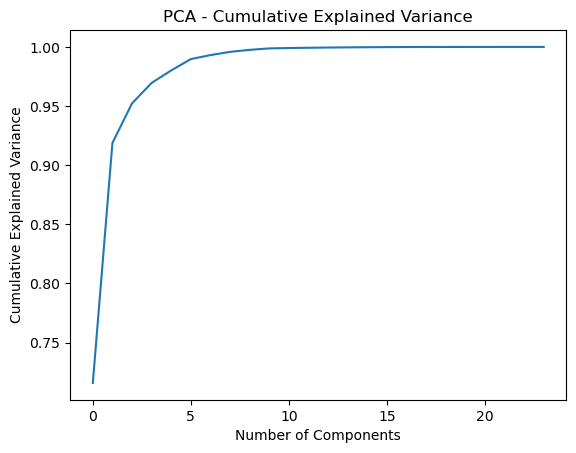

In [67]:
# Visualize the cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var_ratio)
print(f"Cumulative Explained Variance: {cumulative_explained_var}")

# Plot the cumulative explained variance
plt.plot(cumulative_explained_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

### Test Set

In [68]:
n_components = 24
pca = PCA(n_components=n_components)

X_pca_test = pca.fit_transform(X_sc_test)

df_pca_test = pd.DataFrame(data=X_pca_test, columns=columns)

test_final = df_pca_test

# Visualize the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for each component: {explained_var_ratio}")
print(f"Total Explained Variance: {np.sum(explained_var_ratio)}")


Explained Variance Ratio for each component: [5.47914937e-01 2.41780492e-01 8.73726877e-02 5.60269824e-02
 2.72372952e-02 2.11177898e-02 7.65124965e-03 3.52065229e-03
 3.00688408e-03 1.42393635e-03 6.20455585e-04 5.82124967e-04
 3.73961712e-04 3.63742111e-04 2.90970734e-04 2.29447606e-04
 1.53183566e-04 1.26255426e-04 9.67348660e-05 6.79970492e-05
 2.81669142e-05 1.36913607e-05 3.61898225e-07 1.77341834e-35]
Total Explained Variance: 0.9999999999999999


In [69]:
test_final

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.879083,-0.539654,-0.146444,0.063682,0.065195,0.058532,0.005645,-0.005337,0.001193,-0.002848,...,0.000465,-0.000008,0.000005,0.000056,0.000028,-0.000156,-0.000003,-0.000023,-0.000003,-6.762597e-19
1,0.845361,-0.530624,-0.104970,0.003355,-0.020541,-0.078261,-0.059374,-0.010045,0.000344,-0.004215,...,0.000286,0.000263,0.000034,-0.000035,0.000048,-0.000223,0.000011,0.000015,-0.000006,-7.352480e-20
2,-0.201538,0.079892,-0.565527,-0.610707,0.068112,-0.081786,-0.007530,0.007160,0.007837,-0.034679,...,-0.000742,0.001127,0.000434,0.001095,0.000480,-0.000723,0.000043,-0.000738,-0.000068,2.222803e-18
3,0.817472,-0.447312,-0.062615,-0.024548,-0.149171,-0.306804,-0.034475,0.073224,0.000748,-0.010111,...,0.000685,0.000299,0.000046,0.000025,0.000100,-0.000426,0.000007,0.000006,-0.000010,-4.826458e-20
4,-0.821617,-0.000332,-0.123545,0.021069,0.001960,-0.000531,-0.050697,-0.003083,-0.004521,0.002557,...,0.006788,-0.000292,0.000151,-0.000717,0.000222,-0.000223,-0.000006,0.000350,0.000012,5.747947e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,-0.226424,-0.006210,0.631698,0.033482,-0.200397,0.181812,-0.029859,0.007162,-0.020772,-0.009207,...,0.000884,0.002738,-0.000530,-0.002607,-0.000917,-0.000783,0.000107,0.001680,0.000133,9.855004e-21
18873,-0.822619,-0.000355,-0.121460,0.016699,0.000013,-0.003683,-0.070629,-0.004249,-0.005220,0.002946,...,-0.003505,0.001486,0.000275,-0.000502,0.000181,0.000182,0.000066,0.000265,0.000005,-5.652835e-20
18874,-0.822485,0.000683,-0.124578,0.026201,-0.002027,-0.006809,-0.004501,-0.000478,-0.003478,0.001626,...,-0.002685,0.001259,0.000253,-0.000421,0.000191,0.000094,0.000052,0.000242,0.000006,-4.349596e-20
18875,-0.225542,-0.005617,0.628456,0.042311,-0.199650,0.182531,0.023099,0.010214,-0.018706,-0.010505,...,0.007355,0.001301,-0.000724,0.012859,-0.003839,-0.000231,0.000392,-0.010206,-0.000640,2.913928e-20


Cumulative Explained Variance: [0.54791494 0.78969543 0.87706812 0.9330951  0.96033239 0.98145018
 0.98910143 0.99262209 0.99562897 0.99705291 0.99767336 0.99825549
 0.99862945 0.99899319 0.99928416 0.99951361 0.99966679 0.99979305
 0.99988978 0.99995778 0.99998595 0.99999964 1.         1.        ]


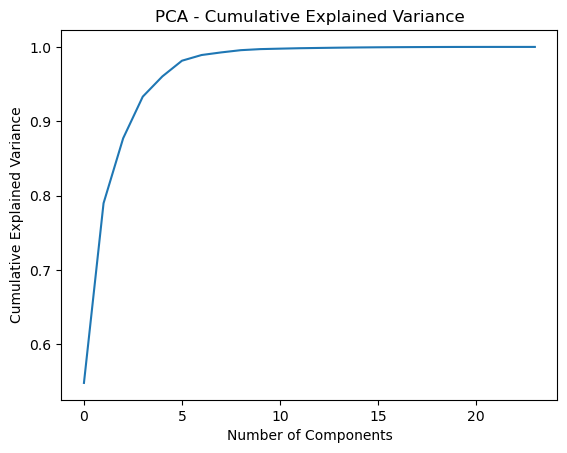

In [70]:
# Visualize the cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var_ratio)
print(f"Cumulative Explained Variance: {cumulative_explained_var}")

# Plot the cumulative explained variance
plt.plot(cumulative_explained_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

## d_norm_pca

In [71]:
d_norm_pca_train = train_final
d_norm_pca_test = test_final

In [72]:
d_norm_pca_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,-0.367113,0.195428,-0.592401,-0.010707,0.274464,-0.391775,0.011901,-0.022410,0.004934,0.012492,...,-0.000185,-0.002284,-0.002355,-1.190464e-04,-0.000053,-0.000056,-0.000026,-0.000012,-1.148177e-05,-4.321820e-19
1,1.147462,-0.250102,-0.027437,-0.089533,-0.011982,0.003408,-0.007527,-0.023777,-0.001182,-0.001136,...,-0.000067,-0.000236,-0.000144,-8.078110e-06,-0.000018,0.000011,-0.000010,-0.000004,1.609495e-06,1.245472e-20
2,-0.668816,-0.333591,-0.027150,0.004577,-0.085417,0.117755,0.000978,-0.033333,-0.006767,-0.002258,...,0.000314,0.000485,-0.000106,1.409549e-05,-0.000002,0.000039,0.000013,-0.000027,2.398005e-06,4.688175e-20
3,-0.853142,-0.186277,0.031603,0.067002,-0.024724,-0.009442,-0.006731,0.130285,0.003363,-0.000236,...,-0.000130,0.000315,-0.000051,2.162755e-07,0.000013,0.000008,0.000008,0.000002,5.110670e-07,-1.034927e-19
4,0.200755,1.191529,0.105176,-0.068313,-0.030462,-0.001988,-0.058050,0.079903,0.008764,-0.000458,...,-0.000816,-0.000816,-0.000326,6.403860e-06,0.000033,0.000030,-0.000043,0.000017,3.358516e-06,1.459385e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,-0.659741,-0.341720,-0.028967,0.006819,-0.088798,0.119139,-0.000096,0.000040,-0.006844,-0.172801,...,0.000337,0.000347,-0.000181,5.722479e-05,-0.000039,0.000020,0.000008,-0.000019,3.480304e-06,2.608268e-20
102685,1.167924,-0.242620,0.001866,0.031654,-0.003969,0.000932,-0.003971,0.084403,0.004239,-0.000574,...,-0.000061,0.000044,0.000382,4.348279e-05,0.000003,-0.000006,0.000005,0.000015,-3.926330e-07,-1.709442e-20
102686,-0.863285,-0.187020,0.014889,-0.001020,-0.021080,-0.004517,0.002466,-0.054512,-0.006649,0.002039,...,0.000027,0.000104,-0.000791,-8.161300e-05,-0.000019,0.000026,-0.000004,-0.000030,2.525808e-06,3.647653e-20
102687,1.154420,-0.246945,-0.017925,-0.049964,-0.007683,0.003330,-0.004052,-0.014104,-0.000853,-0.000417,...,-0.000032,-0.000156,-0.000064,-2.176527e-06,-0.000016,0.000007,-0.000006,-0.000002,1.139955e-06,1.638157e-20


In [73]:
d_norm_pca_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.879083,-0.539654,-0.146444,0.063682,0.065195,0.058532,0.005645,-0.005337,0.001193,-0.002848,...,0.000465,-0.000008,0.000005,0.000056,0.000028,-0.000156,-0.000003,-0.000023,-0.000003,-6.762597e-19
1,0.845361,-0.530624,-0.104970,0.003355,-0.020541,-0.078261,-0.059374,-0.010045,0.000344,-0.004215,...,0.000286,0.000263,0.000034,-0.000035,0.000048,-0.000223,0.000011,0.000015,-0.000006,-7.352480e-20
2,-0.201538,0.079892,-0.565527,-0.610707,0.068112,-0.081786,-0.007530,0.007160,0.007837,-0.034679,...,-0.000742,0.001127,0.000434,0.001095,0.000480,-0.000723,0.000043,-0.000738,-0.000068,2.222803e-18
3,0.817472,-0.447312,-0.062615,-0.024548,-0.149171,-0.306804,-0.034475,0.073224,0.000748,-0.010111,...,0.000685,0.000299,0.000046,0.000025,0.000100,-0.000426,0.000007,0.000006,-0.000010,-4.826458e-20
4,-0.821617,-0.000332,-0.123545,0.021069,0.001960,-0.000531,-0.050697,-0.003083,-0.004521,0.002557,...,0.006788,-0.000292,0.000151,-0.000717,0.000222,-0.000223,-0.000006,0.000350,0.000012,5.747947e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,-0.226424,-0.006210,0.631698,0.033482,-0.200397,0.181812,-0.029859,0.007162,-0.020772,-0.009207,...,0.000884,0.002738,-0.000530,-0.002607,-0.000917,-0.000783,0.000107,0.001680,0.000133,9.855004e-21
18873,-0.822619,-0.000355,-0.121460,0.016699,0.000013,-0.003683,-0.070629,-0.004249,-0.005220,0.002946,...,-0.003505,0.001486,0.000275,-0.000502,0.000181,0.000182,0.000066,0.000265,0.000005,-5.652835e-20
18874,-0.822485,0.000683,-0.124578,0.026201,-0.002027,-0.006809,-0.004501,-0.000478,-0.003478,0.001626,...,-0.002685,0.001259,0.000253,-0.000421,0.000191,0.000094,0.000052,0.000242,0.000006,-4.349596e-20
18875,-0.225542,-0.005617,0.628456,0.042311,-0.199650,0.182531,0.023099,0.010214,-0.018706,-0.010505,...,0.007355,0.001301,-0.000724,0.012859,-0.003839,-0.000231,0.000392,-0.010206,-0.000640,2.913928e-20


## d_norm_pca_probs

In [74]:
X_train=d_norm_pca_train
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train)
train_probabilities = gmm.predict_proba(X_train)
d_norm_pca_probs_train = pd.DataFrame(train_probabilities, columns=columns)
d_norm_pca_probs_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.000000e+00,0.000000,0.000000,1.0,1.159181e-25,0.0,0.000000e+00,0.000000,0.0,0.0,...,3.498006e-08,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
1,0.000000e+00,0.000058,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.999942,0.0,0.0,...,0.000000e+00,0.000000,3.860864e-280,3.612756e-10,0.000000,0.000000e+00,0.0,3.567186e-35,0.0,0.000000
2,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00,0.0,2.806463e-24,0.000000,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
3,4.499437e-43,0.000000,0.000000,0.0,0.000000e+00,0.0,3.361413e-34,0.000000,0.0,0.0,...,0.000000e+00,0.000219,0.000000e+00,0.000000e+00,0.999781,4.945598e-19,0.0,0.000000e+00,0.0,0.000000
4,0.000000e+00,0.000000,0.001288,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.000000e+00,0.000000,1.830379e-309,2.771545e-25,0.000000,0.000000e+00,0.0,2.494295e-142,0.0,0.998712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,1.221402e-279,0.000000,0.000000,0.0,0.000000e+00,0.0,9.036210e-28,0.000000,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.0,0.000000
102685,0.000000e+00,0.006935,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.993065,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,6.199109e-10,0.000000,0.000000e+00,0.0,3.042325e-271,0.0,0.000000
102686,2.847667e-23,0.000000,0.000000,0.0,0.000000e+00,0.0,5.984910e-35,0.000000,0.0,0.0,...,0.000000e+00,0.995076,0.000000e+00,0.000000e+00,0.004924,2.445414e-20,0.0,0.000000e+00,0.0,0.000000
102687,0.000000e+00,0.001031,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.998969,0.0,0.0,...,0.000000e+00,0.000000,0.000000e+00,2.958767e-10,0.000000,0.000000e+00,0.0,4.557617e-46,0.0,0.000000


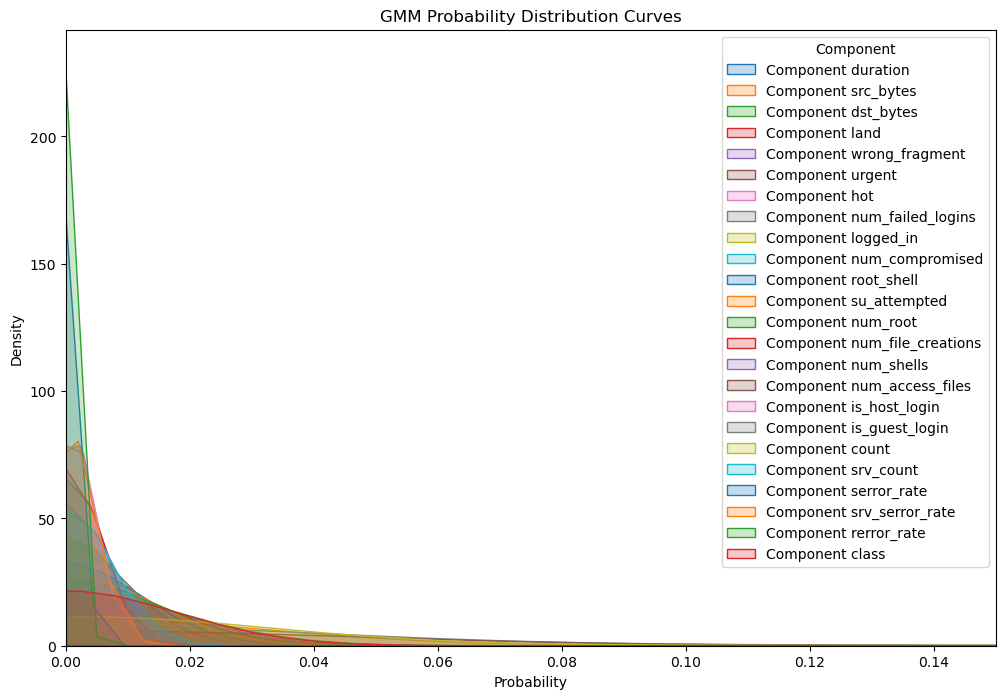

In [75]:
plt.figure(figsize=(12, 8))
for col in d_norm_pca_probs_train.columns:
    sns.kdeplot(d_norm_pca_probs_train[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

In [76]:
X_test=d_norm_pca_test
n_components = 24
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_test)
train_probabilities = gmm.predict_proba(X_test)
d_norm_pca_probs_test = pd.DataFrame(train_probabilities, columns=columns)
d_norm_pca_probs_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,class
0,0.000000e+00,0.0,0.033076,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,9.669237e-01,...,0.000000e+00,0.0,4.850467e-09,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1,0.000000e+00,0.0,0.989431,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.045271e-02,...,0.000000e+00,0.0,1.088773e-08,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.000000e+00,...,1.114849e-07,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
3,0.000000e+00,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,4.970690e-07,0.999997,0.0,0.0,0.0,2.034070e-06,0.0,0.0
4,1.735476e-18,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,9.501877e-58,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18872,0.000000e+00,0.0,0.000000,0.0,9.999996e-01,3.617295e-07,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
18873,4.580741e-19,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,2.100551e-33,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,0.0,0.0
18874,1.017463e-18,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,8.604221e-34,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,0.0,0.0
18875,0.000000e+00,0.0,0.000000,0.0,1.771372e-71,1.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0


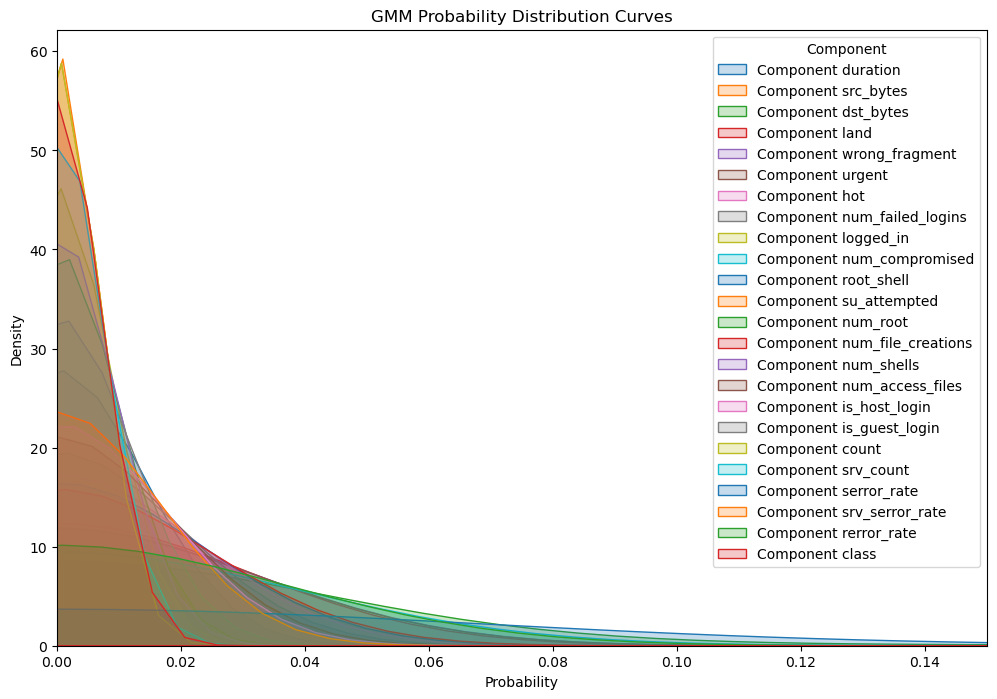

In [77]:
plt.figure(figsize=(12, 8))
for col in d_norm_pca_probs_test.columns:
    sns.kdeplot(d_norm_pca_probs_test[col], fill=True, label=f'Component {col}')

plt.title('GMM Probability Distribution Curves')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(title='Component')
plt.xlim(0, 0.15)
plt.show()

# Modeling and Evaluating

## Voting

### d_raw_probs

In [78]:
y_train=d_raw_probs_train[['class']]
y_test=d_raw_probs_test[['class']]

# Define your hyperparameters
alpha = 0.05
consensus = 5

# Apply the individual feature probability threshold
threshold = d_raw_probs_train.max(axis=0) * (1 - alpha)

# Classify features as normal or anomalous based on the threshold
train_predictions = (d_raw_probs_train > threshold).astype(int)
test_predictions = (d_raw_probs_test > threshold).astype(int)

# Count the number of anomalous features for each vector
anomalous_features_train = train_predictions.sum(axis=1)
anomalous_features_test = test_predictions.sum(axis=1)

# Classify the entire traffic vector as normal or anomalous based on consensus
train_labels = (anomalous_features_train >= consensus).astype(int)
test_labels = (anomalous_features_test >= consensus).astype(int)

y_train_binary = (y_train > 0.9).astype(int)
y_test_binary = (y_test > 0.9).astype(int)

accuracy_train = accuracy_score(y_train_binary, train_labels)
print("Train Set Accuracy:", accuracy_train)

if 'y_test' in locals():
    accuracy_test = accuracy_score(y_test_binary, test_labels)
    print("Test Set Accuracy:", accuracy_test)

Train Set Accuracy: 0.8497502166736457
Test Set Accuracy: 0.9205911956348997


In [79]:
from sklearn.metrics import f1_score, confusion_matrix

# Calculate F1 Score and Sensitivity for the train set
f1_train = f1_score(y_train_binary, train_labels)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_binary, train_labels).ravel()
sensitivity_train = tp_train / (tp_train + fn_train)

print("Train Set F1 Score:", f1_train)
print("Train Set Sensitivity (True Positive Rate):", sensitivity_train)

# If you have true labels for the test set
if 'y_test_binary' in locals():
    # Calculate F1 Score and Sensitivity for the test set
    f1_test = f1_score(y_test_binary, test_labels)
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test_binary, test_labels).ravel()
    sensitivity_test = tp_test / (tp_test + fn_test)

    print("Test Set F1 Score:", f1_test)
    print("Test Set Sensitivity (True Positive Rate):", sensitivity_test)


Train Set F1 Score: 0.0
Train Set Sensitivity (True Positive Rate): 0.0
Test Set F1 Score: 0.0
Test Set Sensitivity (True Positive Rate): 0.0


## SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_train_svm_binary = (y_train > 0).astype(int)
y_test_svm_binary = (y_test > 0).astype(int)


svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train_svm_binary)

# Predictions : train data
train_predictions_svm = svm_classifier.predict(X_train)

# Predictions : test data
test_predictions_svm = svm_classifier.predict(X_test)

# Evaluate :train data
accuracy_train_svm = accuracy_score(y_train_svm_binary, train_predictions_svm)
print("Train Set Accuracy (SVM):", accuracy_train_svm)

# Evaluate SVM : test data
accuracy_test_svm = accuracy_score(y_test_svm_binary, test_predictions_svm)
print("Test Set Accuracy (SVM):", accuracy_test_svm)

# classification repport
print("Classification Report (SVM - Test Set):")
print(classification_report(y_test_svm_binary, test_predictions_svm))

# confusion matrix
conf_matrix_svm = confusion_matrix(y_test_svm_binary, test_predictions_svm)
print("Confusion Matrix (SVM - Test Set):")
print(conf_matrix_svm)


Train Set Accuracy (SVM): 0.9421067495057893
Test Set Accuracy (SVM): 0.5326587911214705
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.82      0.59      0.68     16348
           1       0.06      0.19      0.10      2529

    accuracy                           0.53     18877
   macro avg       0.44      0.39      0.39     18877
weighted avg       0.72      0.53      0.61     18877

Confusion Matrix (SVM - Test Set):
[[9587 6761]
 [2061  468]]


In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Helper function to train and evaluate SVM
def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # Impute missing values with the mean
    imputer = SimpleImputer(strategy="mean")
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Train the SVM model
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_imputed, y_train)

    # Predictions on the test set
    test_predictions_svm = svm_model.predict(X_test_imputed)

    # Accuracy on the test set
    accuracy_svm = accuracy_score(y_test, test_predictions_svm)
    print("Test Set Accuracy (SVM):", accuracy_svm)

    # Classification Report on the test set
    print("Classification Report (SVM - Test Set):")
    print(classification_report(y_test, test_predictions_svm))

    # Confusion Matrix on the test set
    conf_matrix_svm = confusion_matrix(y_test, test_predictions_svm)
    print("Confusion Matrix (SVM - Test Set):")
    print(conf_matrix_svm)

In [82]:
# Apply SVM to d_raw
print("Results for d_raw:")
train_and_evaluate_svm(X_train, newlabel1, X_test, newlabel1_test)
print("\n" + "="*50 + "\n")

# Apply SVM to d_raw_probs
print("Results for d_raw_probs:")
train_and_evaluate_svm(d_raw_probs_train, newlabel1, d_raw_probs_test, newlabel1_test)
print("\n" + "="*50 + "\n")


Results for d_raw:
Test Set Accuracy (SVM): 0.9886104783599089
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7842
           1       1.00      0.98      0.99     11035

    accuracy                           0.99     18877
   macro avg       0.99      0.99      0.99     18877
weighted avg       0.99      0.99      0.99     18877

Confusion Matrix (SVM - Test Set):
[[ 7842     0]
 [  215 10820]]


Results for d_raw_probs:
Test Set Accuracy (SVM): 0.863855485511469
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      7842
           1       0.96      0.80      0.87     11035

    accuracy                           0.86     18877
   macro avg       0.87      0.88      0.86     18877
weighted avg       0.88      0.86      0.86     18877

Confusion Matrix (SVM - Test Set):
[[7436  406]
 [2164 8871]]




In [ ]:
# Apply SVM to d_raw_pca
print("Results for d_raw_pca:")
train_and_evaluate_svm(d_raw_pca_train, newlabel1, d_raw_pca_test, newlabel1_test)
print("\n" + "="*50 + "\n")

Results for d_raw_pca:


In [83]:
# Apply SVM to d_raw_pca_probs
print("Results for d_raw_pca_probs:")
train_and_evaluate_svm(d_raw_pca_probs_train, newlabel1, d_raw_pca_probs_test, newlabel1_test)
print("\n" + "="*50 + "\n")

Results for d_raw_pca_probs:
Test Set Accuracy (SVM): 0.4428140064628914
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.17      0.09      0.12      7842
           1       0.52      0.69      0.59     11035

    accuracy                           0.44     18877
   macro avg       0.35      0.39      0.36     18877
weighted avg       0.37      0.44      0.40     18877

Confusion Matrix (SVM - Test Set):
[[ 715 7127]
 [3391 7644]]




In [84]:
# Apply SVM to d_norm
print("Results for d_norm:")
train_and_evaluate_svm(X_train, newlabel1, X_test, newlabel1_test)
print("\n" + "="*50 + "\n")

# Apply SVM to d_norm_probs
print("Results for d_norm_probs:")
train_and_evaluate_svm(d_norm_probs_train, newlabel1, d_norm_probs_test, newlabel1_test)
print("\n" + "="*50 + "\n")


Results for d_norm:
Test Set Accuracy (SVM): 0.9886104783599089
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7842
           1       1.00      0.98      0.99     11035

    accuracy                           0.99     18877
   macro avg       0.99      0.99      0.99     18877
weighted avg       0.99      0.99      0.99     18877

Confusion Matrix (SVM - Test Set):
[[ 7842     0]
 [  215 10820]]


Results for d_norm_probs:
Test Set Accuracy (SVM): 0.441171796365948
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.10      0.04      0.06      7842
           1       0.52      0.72      0.60     11035

    accuracy                           0.44     18877
   macro avg       0.31      0.38      0.33     18877
weighted avg       0.34      0.44      0.38     18877

Confusion Matrix (SVM - Test Set):
[[ 346 7496]
 [3053 7982]]




In [85]:
# Apply SVM to d_norm_pca
print("Results for d_norm_pca:")
train_and_evaluate_svm(d_norm_pca_train, newlabel1, d_norm_pca_test, newlabel1_test)
print("\n" + "="*50 + "\n")

# Apply SVM to d_norm_pca_probs
print("Results for d_norm_pca_probs:")
train_and_evaluate_svm(d_norm_pca_probs_train, newlabel1, d_norm_pca_probs_test, newlabel1_test)
print("\n" + "="*50 + "\n")


Results for d_norm_pca:
Test Set Accuracy (SVM): 0.9886104783599089
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7842
           1       1.00      0.98      0.99     11035

    accuracy                           0.99     18877
   macro avg       0.99      0.99      0.99     18877
weighted avg       0.99      0.99      0.99     18877

Confusion Matrix (SVM - Test Set):
[[ 7842     0]
 [  215 10820]]


Results for d_norm_pca_probs:
Test Set Accuracy (SVM): 0.441171796365948
Classification Report (SVM - Test Set):
              precision    recall  f1-score   support

           0       0.10      0.04      0.06      7842
           1       0.52      0.72      0.60     11035

    accuracy                           0.44     18877
   macro avg       0.31      0.38      0.33     18877
weighted avg       0.34      0.44      0.38     18877

Confusion Matrix (SVM - Test Set):
[[ 346 7496]
 [3053 79